In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns


table = pd.read_excel('data_base/Base_de_Dados.xlsx')
table

,Tipos de Clientes,País,Produto,Qtde de Unidades Vendidas,Preço Unitário,Valor Total,Desconto,Valor Total c/ Desconto,Custo Total,Lucro,Data,Mês,Ano
0,Governo,Canadá,Produto 1,1618.5,20,32370.0,0.00,32370.00,17803.5,14566.50,2019-01-01,Janeiro,2019
1,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.00,26420.00,14531.0,11889.00,2019-01-01,Janeiro,2019
2,Médias Empresas,França,Produto 1,2178.0,15,32670.0,0.00,32670.00,23958.0,8712.00,2019-06-01,Junho,2019
3,Médias Empresas,Alemanha,Produto 1,888.0,15,13320.0,0.00,13320.00,9768.0,3552.00,2019-06-01,Junho,2019
4,Médias Empresas,Chile,Produto 1,2470.0,15,37050.0,0.00,37050.00,27170.0,9880.00,2019-06-01,Junho,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Pequenas Empresas,França,Produto 6,2475.0,300,742500.0,111375.00,631125.00,618750.0,12375.00,2019-03-01,Março,2019
696,Pequenas Empresas,Chile,Produto 6,546.0,300,163800.0,24570.00,139230.00,136500.0,2730.00,2019-10-01,Outubro,2019
697,Governo,Chile,Produto 2,1368.0,7,9576.0,1436.40,8139.60,6840.0,1299.60,2019-02-01,Fevereiro,2019
698,Governo,Canadá,Produto 3,723.0,7,5061.0,759.15,4301.85,3615.0,686.85,2019-04-01,Abil,2019


In [3]:
agrupado = table.groupby(['País'])['Lucro'].sum().reset_index()
agrupado

,País,Lucro
0,Alemanha,3411122.220
1,Canadá,3311818.985
2,Chile,2658929.810
3,EUA,2835405.865
4,França,3477575.080


<Axes: >

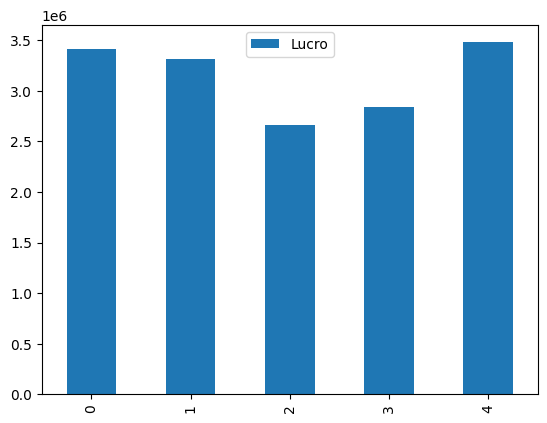

In [4]:
agrupado.plot.bar()

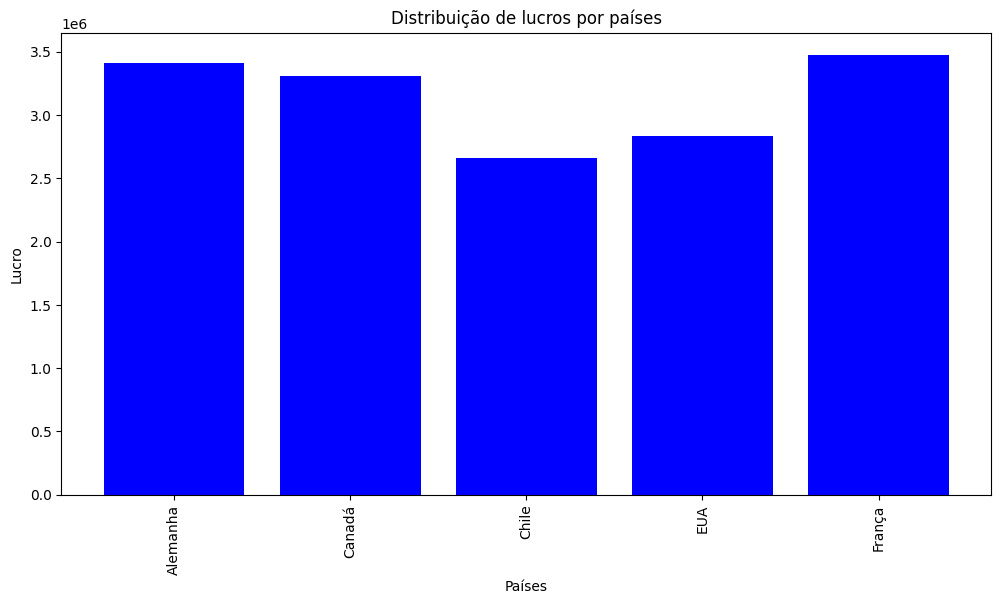

In [5]:
agrupado.rename(columns={'Lucro': 'Soma dos Lucros'}, inplace=True)
plt.figure(figsize=(12, 6))
plt.bar(agrupado['País'], agrupado['Soma dos Lucros'], color='blue')
plt.xlabel('Países')
plt.ylabel('Lucro')
plt.title('Distribuição de lucros por países')
plt.xticks(rotation=90)
plt.show()

In [6]:
# margem de lucro = Faturamento liguido de clientes / lucro clientes

margem_de_lucro = agrupado.groupby('País')/table['Preço Unitário']
margem_de_lucro

# Criando o DataFrame
data = {
    'País': ['Alemanha', 'Canadá', 'Chile', 'EUA', 'França'],
    'Valor': [3411122.220, 3311818.985, 2658929.810, 2835405.865, 3477575.080]
}
df = pd.DataFrame(data).set_index('País')

lista_margem_de_lucro_paises = []

for pais, valor in df['Valor'].items():
    lista_margem_de_lucro_paises.append(valor)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 2) + inhomogeneous part.

In [ ]:
table

,Tipos de Clientes,País,Produto,Qtde de Unidades Vendidas,Preço Unitário,Valor Total,Desconto,Valor Total c/ Desconto,Custo Total,Lucro,Data,Mês,Ano
0,Governo,Canadá,Produto 1,1618.5,20,32370.0,0.00,32370.00,17803.5,14566.50,2019-01-01,Janeiro,2019
1,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.00,26420.00,14531.0,11889.00,2019-01-01,Janeiro,2019
2,Médias Empresas,França,Produto 1,2178.0,15,32670.0,0.00,32670.00,23958.0,8712.00,2019-06-01,Junho,2019
3,Médias Empresas,Alemanha,Produto 1,888.0,15,13320.0,0.00,13320.00,9768.0,3552.00,2019-06-01,Junho,2019
4,Médias Empresas,Chile,Produto 1,2470.0,15,37050.0,0.00,37050.00,27170.0,9880.00,2019-06-01,Junho,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Pequenas Empresas,França,Produto 6,2475.0,300,742500.0,111375.00,631125.00,618750.0,12375.00,2019-03-01,Março,2019
696,Pequenas Empresas,Chile,Produto 6,546.0,300,163800.0,24570.00,139230.00,136500.0,2730.00,2019-10-01,Outubro,2019
697,Governo,Chile,Produto 2,1368.0,7,9576.0,1436.40,8139.60,6840.0,1299.60,2019-02-01,Fevereiro,2019
698,Governo,Canadá,Produto 3,723.0,7,5061.0,759.15,4301.85,3615.0,686.85,2019-04-01,Abil,2019


In [ ]:
produtos = table['Produto'].unique()
produtos

array(['Produto 1', 'Produto 2', 'Produto 3', 'Produto 4', 'Produto 5',
       'Produto 6'], dtype=object)

In [ ]:
table

,Tipos de Clientes,País,Produto,Qtde de Unidades Vendidas,Preço Unitário,Valor Total,Desconto,Valor Total c/ Desconto,Custo Total,Lucro,Data,Mês,Ano
0,Governo,Canadá,Produto 1,1618.5,20,32370.0,0.00,32370.00,17803.5,14566.50,2019-01-01,Janeiro,2019
1,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.00,26420.00,14531.0,11889.00,2019-01-01,Janeiro,2019
2,Médias Empresas,França,Produto 1,2178.0,15,32670.0,0.00,32670.00,23958.0,8712.00,2019-06-01,Junho,2019
3,Médias Empresas,Alemanha,Produto 1,888.0,15,13320.0,0.00,13320.00,9768.0,3552.00,2019-06-01,Junho,2019
4,Médias Empresas,Chile,Produto 1,2470.0,15,37050.0,0.00,37050.00,27170.0,9880.00,2019-06-01,Junho,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Pequenas Empresas,França,Produto 6,2475.0,300,742500.0,111375.00,631125.00,618750.0,12375.00,2019-03-01,Março,2019
696,Pequenas Empresas,Chile,Produto 6,546.0,300,163800.0,24570.00,139230.00,136500.0,2730.00,2019-10-01,Outubro,2019
697,Governo,Chile,Produto 2,1368.0,7,9576.0,1436.40,8139.60,6840.0,1299.60,2019-02-01,Fevereiro,2019
698,Governo,Canadá,Produto 3,723.0,7,5061.0,759.15,4301.85,3615.0,686.85,2019-04-01,Abil,2019


In [ ]:
lucro_produtos = table.groupby('Produto')['Lucro'].sum().reset_index()
lucro_produtos

,Produto,Lucro
0,Produto 1,627954.585
1,Produto 2,2114754.880
2,Produto 3,4797437.950
3,Produto 4,2305992.465
4,Produto 5,3034608.020
5,Produto 6,2814104.060


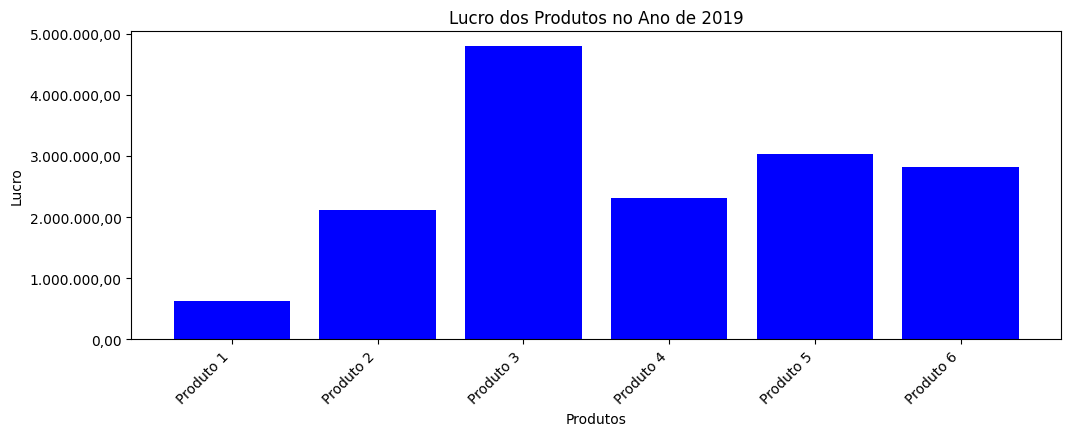

In [ ]:
# Função de formatação para notação brasileira
def formato_brasileiro(x, pos):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(12, 4))
plt.bar(lucro_produtos['Produto'], lucro_produtos['Lucro'], color='blue')
plt.xlabel('Produtos')
plt.ylabel('Lucro')
plt.title('Lucro dos Produtos no Ano de 2019')

# Configurar o eixo y para evitar notação científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_brasileiro))

# Rotacionar os valores do eixo y para melhorar a leitura, se necessário
plt.xticks(rotation=45, ha='right')

plt.show()



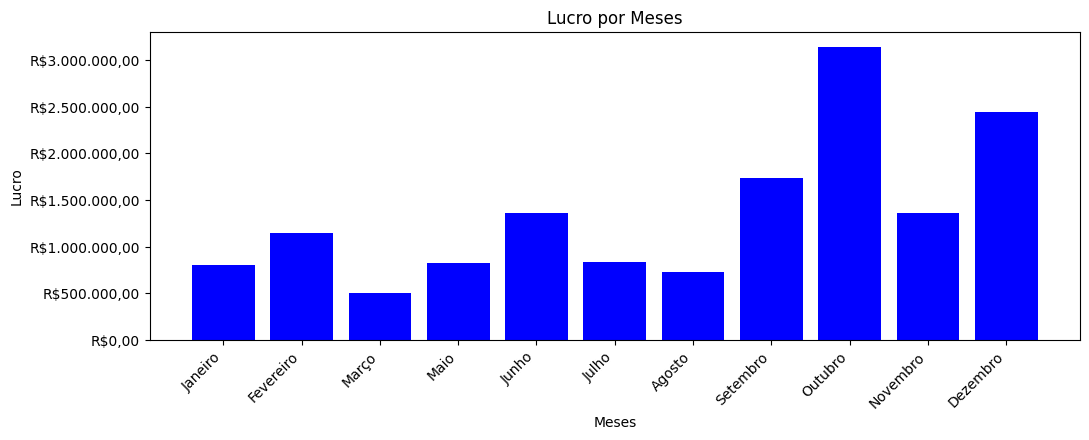

In [ ]:
# Removendo linhas com valores NaN na coluna 'Mês'
lucro_meses = lucro_meses.dropna(subset=['Mês'])

# Definindo a ordem correta dos meses
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Convertendo a coluna 'Mês' para uma categoria com a ordem especificada
lucro_meses['Mês'] = pd.Categorical(lucro_meses['Mês'], categories=ordem_meses, ordered=True)

# Ordenando o DataFrame pela coluna 'Mês'
lucro_meses_ordenado = lucro_meses.sort_values('Mês')

# Função para formatar o eixo y no formato brasileiro (1.000,00)
def formato_brasileiro(x, pos):
    return f'R${x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Plotando o gráfico
plt.figure(figsize=(12, 4))
plt.bar(lucro_meses_ordenado['Mês'], lucro_meses_ordenado['Lucro'], color='blue')
plt.xlabel('Meses')
plt.ylabel('Lucro')
plt.title("Lucro por Meses")

# Configurar o eixo y para evitar notação científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_brasileiro))

# Rotacionar os valores do eixo y para melhorar a leitura, se necessário
plt.xticks(rotation=45, ha='right')

plt.show()

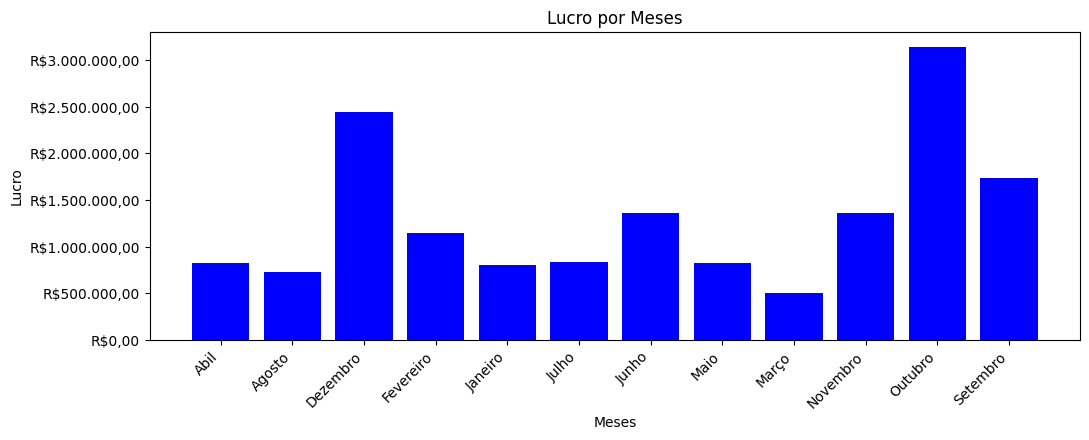

In [ ]:
lucro_meses = table.groupby('Mês')['Lucro'].sum().reset_index()
lucro_meses = lucro_meses.dropna(subset=['Mês'])

plt.figure(figsize=(12, 4))

plt.bar(lucro_meses['Mês'], lucro_meses['Lucro'], color='blue')
plt.xlabel('Meses')
plt.ylabel('Lucro')
plt.title("Lucro por Meses")

# Configurar o eixo y para evitar notação científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_brasileiro))

# Rotacionar os valores do eixo y para melhorar a leitura, se necessário
plt.xticks(rotation=45, ha='right')

plt.show()

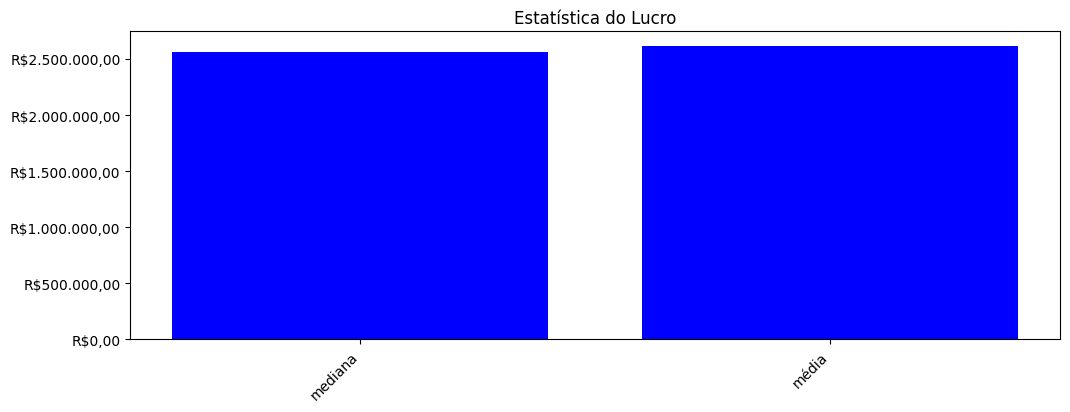

In [ ]:
mediana_lucro_produtos = lucro_produtos['Lucro'].median()
mediana_lucro_produtos
media_lucro_produtos = lucro_produtos['Lucro'].mean()
list_estatistic_informations = [mediana_lucro_produtos, media_lucro_produtos]
formulas = ['mediana', 'média']

df = pd.DataFrame({'formulas': formulas, 'valores': list_estatistic_informations})

plt.figure(figsize=(12, 4))
plt.bar(df['formulas'], df['valores'], color='blue')

# Configurar o eixo y para evitar notação científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_brasileiro))

# Rotacionar os valores do eixo y para melhorar a leitura, se necessário
plt.xticks(rotation=45, ha='right')
plt.title('Estatística do Lucro')
plt.show()


In [ ]:
media_lucro_produtos = table.groupby('Produto')['Lucro'].sum().reset_index()
media_lucro_produtos
lista_lucro_produtos = media_lucro_produtos['Lucro'].to_list()
lista_lucro_produtos

[627954.584999999, 2114754.88, 4797437.95, 2305992.465, 3034608.02, 2814104.06]

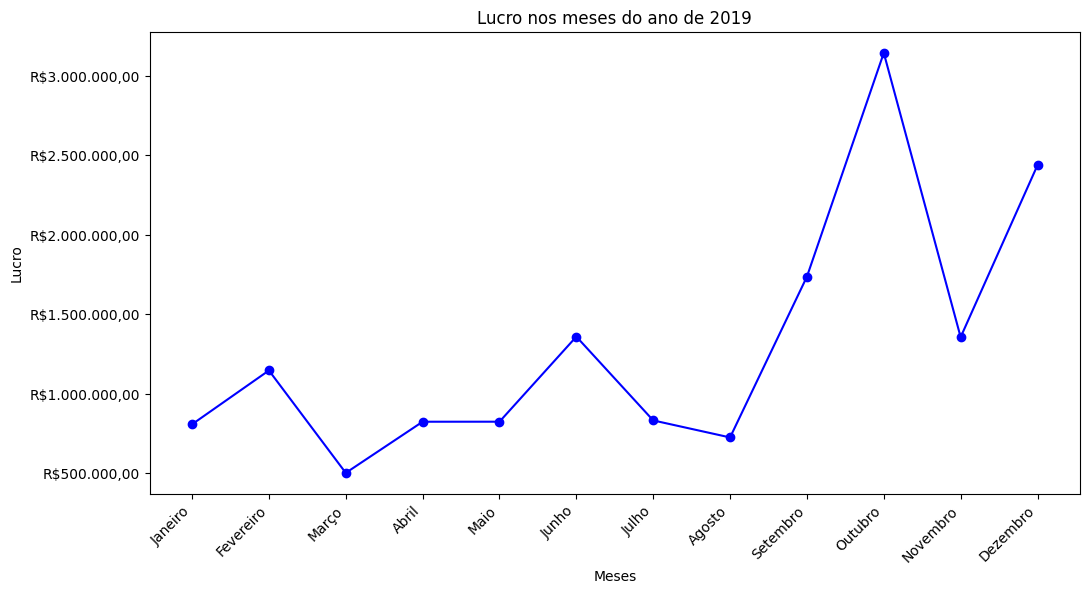

In [7]:
# Supondo que 'table' seja o DataFrame original
lucro_meses = table.groupby('Mês')['Lucro'].sum().reset_index()
lucro_meses = lucro_meses.dropna(subset=['Mês'])

# Corrigindo o nome do mês "Abil" para "Abril"
lucro_meses['Mês'] = lucro_meses['Mês'].replace('Abil', 'Abril')

# Definindo a ordem correta dos meses
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Convertendo a coluna 'Mês' para uma categoria com a ordem especificada
lucro_meses['Mês'] = pd.Categorical(lucro_meses['Mês'], categories=ordem_meses, ordered=True)

# Ordenando o DataFrame pela coluna 'Mês'
lucro_meses_ordenado = lucro_meses.sort_values('Mês')

# Função para formatar o eixo y no formato brasileiro (1.000,00)
def formato_brasileiro(x, pos):
    return f'R${x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(12, 6))
plt.plot(lucro_meses_ordenado['Mês'].astype(str), lucro_meses_ordenado['Lucro'], marker='o', linestyle='-', color='blue')
plt.title('Lucro nos meses do ano de 2019')
plt.xlabel('Meses')
plt.ylabel('Lucro')

# Configurar o eixo y para evitar notação científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_brasileiro))

# Rotacionar os valores do eixo x para melhorar a leitura, se necessário
plt.xticks(rotation=45, ha='right')

plt.show()